In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                2952 non-null   object 
 1   Product_Description  2952 non-null   object 
 2   Screen_Size          2952 non-null   float64
 3   RAM                  2952 non-null   object 
 4   Processor            2952 non-null   object 
 5   GPU                  2604 non-null   object 
 6   GPU_Type             2718 non-null   object 
 7   Resolution           2565 non-null   object 
 8   Condition            2952 non-null   object 
 9   Price                2952 non-null   float64
dtypes: float64(2), object(8)
memory usage: 230.8+ KB
None


Widzimy, że w naszej ramce danych $\texttt{df}$ znajduje się $2952$ wierszy, $10$ kolumn, gdzie każda z kolumn ma typ taki, jak jest napisane po prawej stronie. (Typ object to w tym przypadku po prostu str.)

In [12]:
df.describe()

,Screen_Size,Price
count,2952.000000,2952.000000
mean,14.550237,517.552805
std,1.175322,235.592872
min,10.000000,0.000000
25%,14.000000,325.990000
50%,14.000000,489.990000
75%,15.600000,699.000000
max,18.000000,999.990000


W powyższy sposób wyznaczyliśmy statystyki opisowe dla kolumn ramki $\texttt{df}$ o numerycznych wartościach.

In [31]:
df1 = pd.DataFrame(df.groupby("Brand").Screen_Size.agg("mean"))
df1.rename(columns={"Screen_Size": "Average screen size"}, inplace = True)
df1

,Average screen size
Brand,
AVITA,14.000000
Acer,14.915000
Apple,14.060000
Asus,15.373134
ByteSpeed,15.600000
Chuwi,14.050000
Dell,14.452119
Dell Inc.,15.600000
Eurocom,15.600000


Wyznaczyliśmy średnią wielkość ekranu dla laptopów każdej z marek.

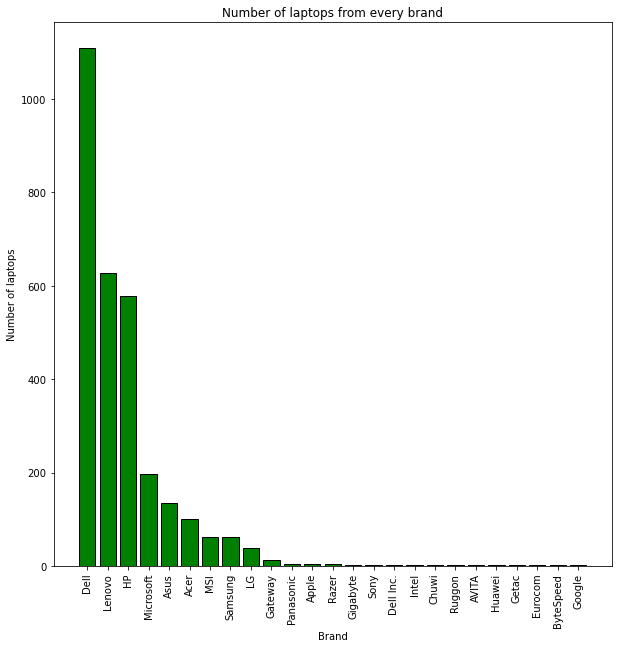

In [75]:
df2 = df.groupby("Brand").Screen_Size.agg("count").reset_index()
df2.sort_values("Screen_Size", inplace=True, ascending= False)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
plt.bar(df2.iloc[:,0], df2.iloc[:,1], edgecolor = "black", color = "green")
plt.xticks(rotation = 90)
plt.xlabel("Brand")
plt.ylabel("Number of laptops")
plt.title("Number of laptops from every brand")
plt.show()

Wykres pokazuje w jaki sposób rozkłada się zmienna $\texttt{Brand}$.

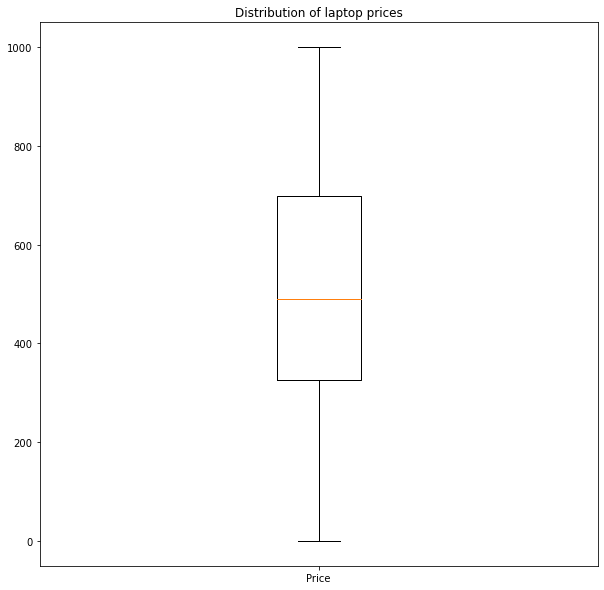

In [79]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
plt.boxplot(df.Price)
ax.set_xticklabels(["Price"])
plt.title("Distribution of laptop prices")
plt.show()

Wykres przedstawia rozkład cen laptopów w naszej ramce danych.

c:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


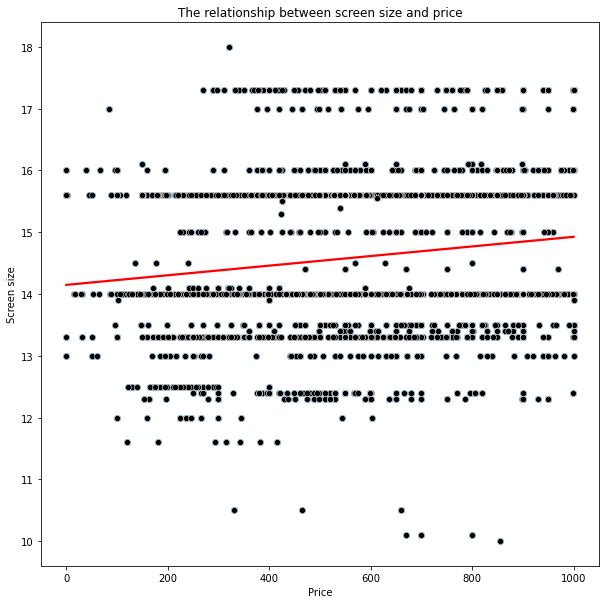

In [116]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

sns.regplot(df.Price, df.Screen_Size, ci = False, line_kws={"color":"red"})
sns.scatterplot(df.Price, df.Screen_Size, color = "black")

plt.ylabel("Screen size")
plt.title("The relationship between screen size and price")
plt.show()


Powyższy wykres pokazuje zależność między ceną a rozmiarem ekranu laptopa. Wnioski są takie, że jest pewien trend wskazujący na to, że im większa cena tym większy wyświetlacz, ale jest to delikatna zależność. 

C:\Users\macie\AppData\Local\Temp\ipykernel_33744\2222000257.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.merge(brands, on="Brand").loc[:,["Brand", "Price"]].groupby("Brand").boxplot(ax = ax, grid=False)


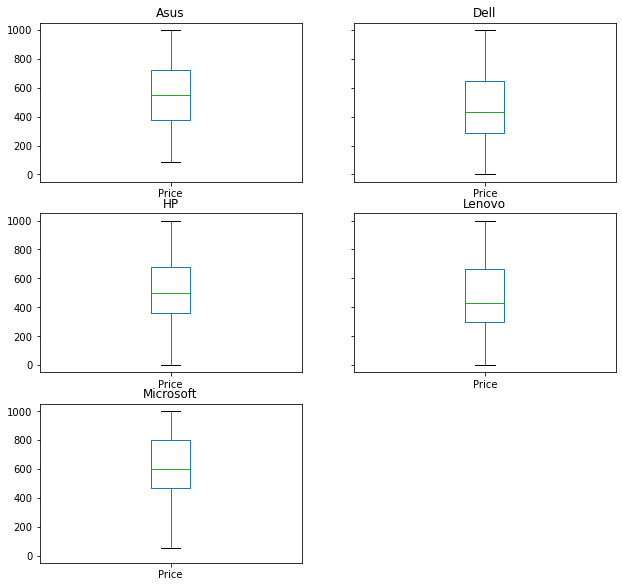

In [175]:
df3 = df.groupby("Brand").agg("count").reset_index()
brands = pd.DataFrame(df3.loc[df3.Price > 100].Brand).reset_index(drop=True)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
df.merge(brands, on="Brand").loc[:,["Brand", "Price"]].groupby("Brand").boxplot(ax = ax, grid=False)
plt.title("Distribution of prices among brands with over 100 laptops in the database")
plt.show()



Powyższy wykres pokazuje zależność ceny od marki laptopa. Możemy zauważyć, że największą średnią cenę mają laptopy firmy Microsoft, a najniższą Lenovo.